In [2]:
%matplotlib inline

In [3]:
from matplotlib import pyplot as pl

In [4]:
import numpy as np

In [5]:
import matplotlib.gridspec as gridspec

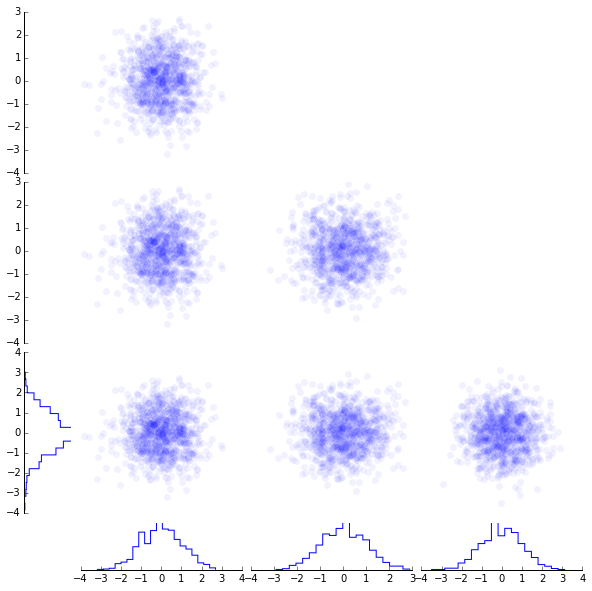

In [56]:
# number of parameters
ndims = 4

# ratio of joint plots to histogram plots
ratio = 3

gridsize = ratio*(ndims-1) + 1

gs = gridspec.GridSpec(gridsize, gridsize, wspace=0.2, hspace=0.2)
f = pl.figure(figsize=(10,10))
x = np.random.randn(1000, ndims)

# set axes for the histograms
histaxes = []
histaxes.append(f.add_subplot(gs[ratio*(ndims-2):-1,0]))

histvert = [] # empty subplots, but axes are required
for i in range(ndims-1):
    ax = f.add_subplot(gs[i*ratio:(i+1)*ratio,0])
    ax.spines['top'].set_visible(False)    # remove top border
    ax.spines['bottom'].set_visible(False) # remove bottom border
    ax.spines['right'].set_visible(False)  # remove right border
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.yaxis.set_ticks_position('left') # just show ticks on left
    histvert.append(ax)

# plot horizontal histogram
histvert[-1].hist(x[:,0], bins=20, histtype='step', normed=True, orientation='horizontal')

histhori = []
for i in range(ndims-1):
    ax = f.add_subplot(gs[-1,(i*ratio+1):(1+(i+1)*ratio)])
    ax.spines['top'].set_visible(False)    # remove top border
    ax.spines['left'].set_visible(False)   # remove left border
    ax.spines['right'].set_visible(False)  # remove right border
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.xaxis.set_ticks_position('bottom') # just show ticks on left
    histhori.append(ax)
    histhori[i].hist(x[:,i+1], bins=20, histtype='step', normed=True)

jointaxes = []
for i in range(ndims-1):
    for j in range(i+1):
        ax = f.add_subplot(gs[i*ratio:(i+1)*ratio,(j*ratio+1):(1+(j+1)*ratio)], sharey=histvert[i], sharex=histhori[j])
        ax.spines['top'].set_visible(False)    # remove top border
        ax.spines['left'].set_visible(False)   # remove bottom border
        ax.spines['right'].set_visible(False)  # remove right border
        ax.spines['bottom'].set_visible(False) # remove bottom border
        #ax.set_yticklabels([])
        pl.setp(ax.get_xticklabels(), visible=False) # remove xtick labels
        pl.setp(ax.get_yticklabels(), visible=False) # remove ytick labels
        ax.tick_params(bottom='off', top='off', left='off', right='off') # remove tick marks 
        ax.plot(x[:,j], x[:,j+1], 'bo', ms=6, mfc='b', alpha=0.05, markeredgecolor='b') # plot scatter
        jointaxes.append(ax)
